In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [4]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

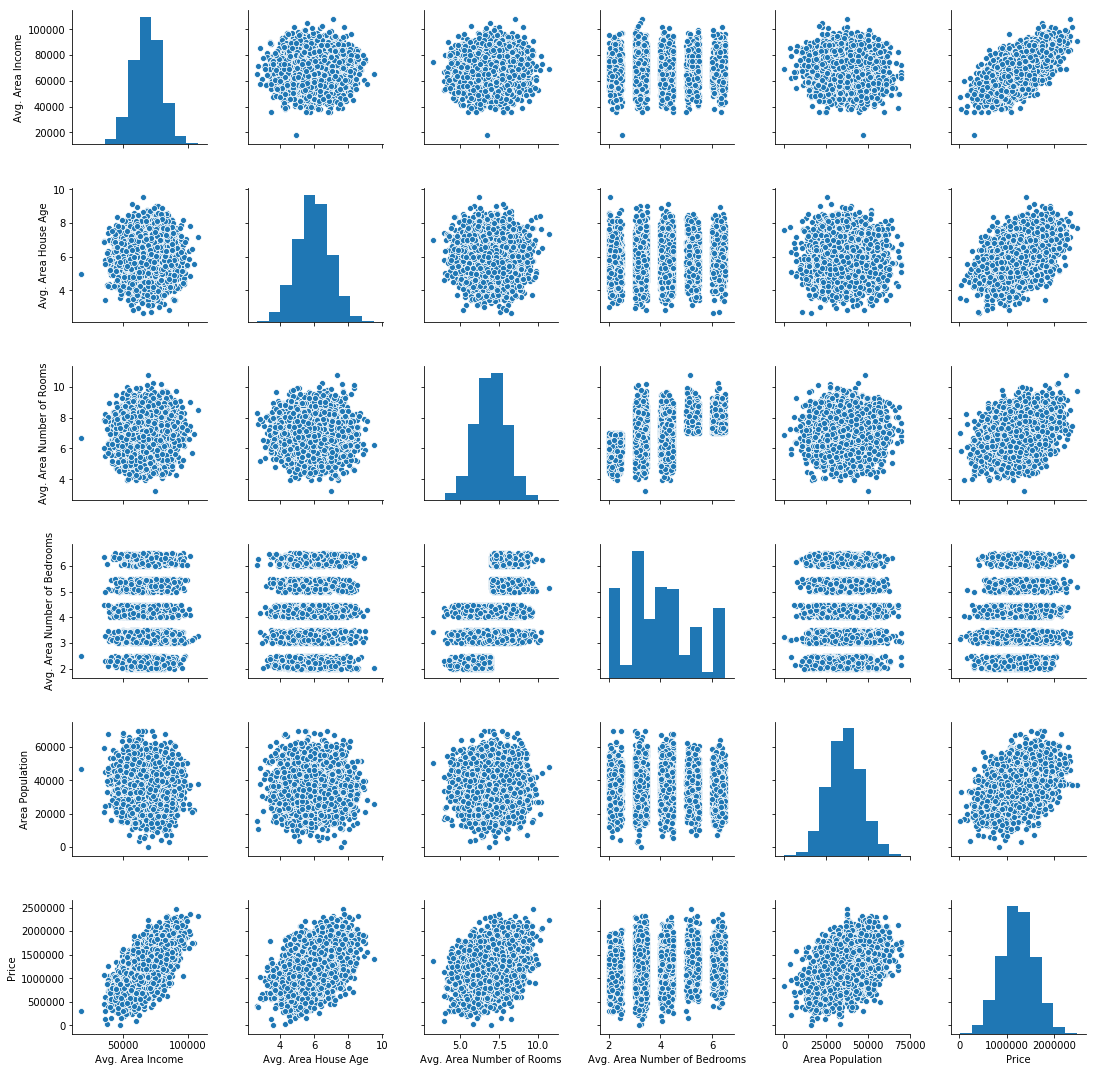

In [5]:
sns.pairplot(data=USAhousing)

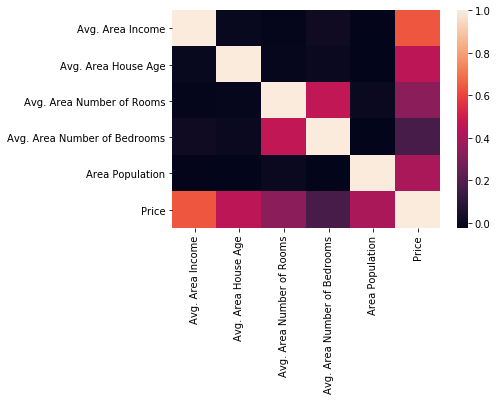

In [6]:
sns.heatmap(USAhousing.corr())

In [7]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [20]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [21]:
X.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [18]:
y = USAhousing['Price'] # o que será predito

In [19]:
type(y)

pandas.core.series.Series

In [15]:
from sklearn.model_selection import train_test_split # capaz de divir os dados X e Y em treino e teste

In [22]:
X_train, X_test, y_train, y_teste = train_test_split(X, y, test_size=0.4, random_state=101) #random_state=101 para ficar igual ao video

In [23]:
X_train.head() # perceba que os dados foram selecionados aleatoriamente

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1303      68091.179676             5.364208                   7.502956   
1051      75729.765546             5.580599                   7.642973   
4904      70885.420819             6.358747                   7.250241   
931       73386.407340             4.966360                   7.915453   
4976      75046.313791             5.351169                   7.797825   

      Avg. Area Number of Bedrooms  Area Population  
1303                          3.10     44557.379656  
1051                          4.21     29996.018448  
4904                          5.42     38627.301473  
931                           4.30     38413.490484  
4976                          5.23     34107.888619

In [25]:
X_test.shape

(2000, 5)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression() # instanciando o objeto

In [29]:
lm.fit(X_train, y_train) # vai encontrar os coeficientes lineares passando os parâmetros x e y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(lm.coef_) # coeficiente angular da reta?

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [31]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefs'])

In [32]:
coefs

Coefs
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [33]:
predict  = lm.predict(X_test)
predict

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [36]:
len(predict)

2000

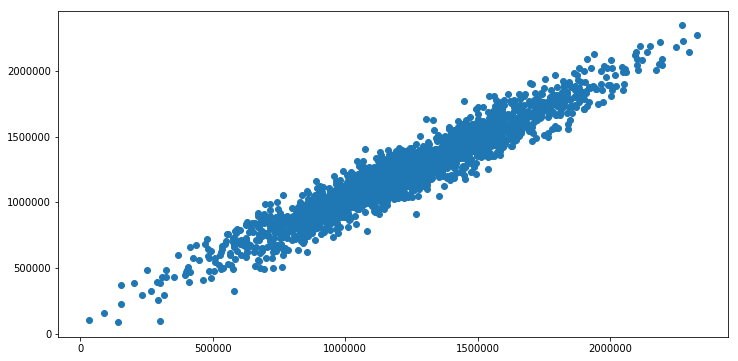

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(y_teste, predict) # no eixo x temos os valores reais, e no y os valores do modelo

/home/rodrigords/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


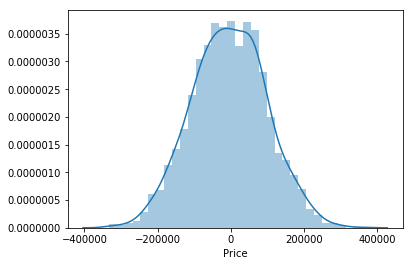

In [38]:
sns.distplot(y_teste-predict)

In [39]:
from sklearn import metrics

In [41]:
print('MAE', metrics.mean_absolute_error(y_teste, predict))

MAE 82288.22251914957


In [42]:
print('MSE', metrics.mean_squared_error(y_teste, predict))

MSE 10460958907.209501
